# STIR models Part 1: Vasicek and other processes

Short rate models are broadly of two types 
* Arbitrage free models 
* Equilibrium models

Arb free models have a deterministic part which allows the model to be fit to market prices. In contrast, equilibrium models have a long term mean reversion level around which the rates are expected to evolve. Arb free models have great utility in terms of enabling market makers to quote price for securities that are illiquid (after calibration). 


### Ho-Lee model
$ dr\ =\ \lambda_tdt\ +\ \sigma dw$ 

Ho-Lee Model is a one-factor model with  $\lambda_t$ being a time dependent deterministic variable instead of a constant. That is, the drift in time 1 may be different than the drift in time 2; additionally, each drift does not have to increase and can even be negative. Thus, the model is more flexible than the constant drift model. The drift is a combination of the risk premium over the period and the expected rate change.


### Vasicek model
$dr\ =\ k(\theta-r)dt\ +\ \sigma dw$

The Vasicek model assumes a mean-reverting process for short-term interest rates. With θ being a constant variable instead of time dependent as in other models like Hull-White, it brings stability at the cost of accurateness. Mean reversion although is a reasonable assumption but clearly breaks down in periods of extremely high inflation (i.e., hyperinflation) or similar structural breaks. 


### Cox Ingersoll Ross (CIR) model
$dr\ =\ k(\theta-r)dt\ +\ \sigma\sqrt r dw$

CIR avoids negative rates . This may be seen as an advantange by some people, although current economic conditions say that negative rates may very well be plausible. 


### One factor Hull White model
$dr\ =\ k(\theta(t)-\alpha r_t)dt\ +\ \sigma dw$

This is similar to Vasicek, except that the mean reverting level is not constant. θ(t) in Hull-White is more difficult to handle computationally as compared to θ in Vasicek. A one-factor model only allows us to parallel moves of the yield curve. The Two-factor Hull-White model (see below) calibrates better to the current market structures when compared to its One-factor alternative.


### Two factor Hull White model
$ dr(t)\ =\ (\theta\ (t)\ +u(t)\ -\ ar(t))dt\ \ +\ \sigma_1(t)dW_1(t)   $<br>
$ du(t)\ =\ -bu(t)\ dt\ \ +\ \sigma_2(t)dW_2(t)   $<br>

The Hull-White Two-Factor Model is equivalent to a Two-Additive-Factor Gaussian Model. This models has two factors, a time dependent deterministic function and drift, and also a time dependent vol.


# Summary
Below is a summary of the major short rate models and the category that they belong to:

| Model | SDE | Type | Description |
| :- | :-: | :- | :- |
| Vasicek |$$ dr\ =\ k(\theta-r)dt\ +\ \sigma dw\ $$| Equilibrium  | Mean reverting drift, constant vol |
| Ho-Lee |$$ dr\ =\ \lambda_tdt\ +\ \sigma dw $$| No arbitrage  | Time dependent drift, constant vol |
| CIR |$$ dr\ =\ k(\theta-r)dt\ +\ \sigma dw\ $$| Equilibrium  | Mean reverting drift, vol function of rate level (square root of rate level) |
| Hull-White (single factor) |$$ dr\ =\ k(\theta(t)-\alpha r_t)dt\ +\ \sigma dw\  $$| No arbitrage  | Time and rate level dependent drift, constant vol |
| Hull-White (two factor) |$$ dr(t)\ =\ (\theta\ (t)\ +u(t)\ -\ a(t))dt\ \ +\ \sigma_1(t)dW_1(t)   $$ $$ du(t)\ =\ -bu(t)\ dt\ \ +\ \sigma_2(t)dW_2(t)   $$| No arbitrage  | Two factor, time dependent deterministic function and drift and also time dependent vol  |

# Vasicek model
We will be focussing on the Vasicek model now, to simulate short term interest rate paths.
The model is defined as follows:

$$ dr_t = \alpha(b-r_t)dt + \sigma dW_t$$
$$r_0=r(0)$$ 

where,
* $r_0$ is the short term interest rate at time 0
* $a,b$ and sigma are constants
* $W_t$ is a standard Brownian motion

### Characterstics of Vasicek model
* The  Vasicek  model  incorporates  mean  reversion.  The flexibility  of the model also  allows  for  risk  premium,  which  enters  into  the model  as  constant  drift  or  a  drift that changes  over  time. 
* The Vasicek model will produce a term structure of volatility that is declining. Therefore, short-term volatility is overstated and long-term volatility is understated.
* Consider an upward shift in the short-term rate. In the mean-reverting model, the short-term rate will be impacted more than long-term rates. Therefore, the Vasicek model does not imply parallel shifts from exogenous liquidity shocks.
* Smaller the mean reversion parameter, the longer it takes for the economic news to be assimilated into security prices.

The solution to the above Vasicek SDE for the short term interest rate is:
$$ r_t = r(0)e^{-\alpha t} + b(1-e^{- \alpha t}) + \sigma e^{- \alpha t} \int_0^t e^{\alpha s } dW_s$$ 

The implication is that $r_t$ is normally distributed
$$ r_t \sim N(r(0)e^{-\alpha t} + b(1-e^{- \alpha t}), \frac{\sigma^2}{2 \alpha}(1 - e^{- 2\alpha t}))$$

with <br>
Mean = $ r(0)e^{-\alpha t} + b(1-e^{- \alpha t})$ <br>
Variance = $ \frac{\sigma^2}{2 \alpha}(1 - e^{- 2\alpha t})$ 

### Modelling path

Under the Vasicek model, we can find $r_{t2}$ if we know $r_{t1}$ and if $t_2>t_1$
- Mean for $r_{t2}$ : $ r_{t_1}e^{- \alpha(t_2 - t_1)} + b(1-e^{- \alpha(t_2 - t_1)})$
- Variance for $r_{t2}$ : $ \frac{\sigma^2}{2 \alpha}(1 - e^{- \alpha(t_2 - t_1)}))$

Since we know that $W_t$ in the Vasicek SDE is a standard Brownian motion, we can treat $t_1$ as our new starting path.

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [3]:
# parameters
r0 = 0.05
alpha = 0.2
b = 0.09
sigma = 0.020

In [4]:
def vasi_mean(r, t1, t2):
    return np.exp(-alpha*(t2-t1))*r+b*(1-np.exp(-alpha*(t2-t1)))

def vasi_var(t1,t2):
    return (sigma**2)*(1-np.exp(-2*alpha*(t2-t1)))/(2*alpha)

We use the above function to calculate the mean and var at $t+1$ given $r_t$ at time $t$

### Simulating rate paths

Paths are defined as follows
$$ r_{i+1} = r_i e^{- \alpha(t_{i+1} - t_i)} + b(1 - e^{\alpha (t_{i+1} - t_i)}) + \sqrt{\frac{\sigma^2}{2 \alpha}(1 - e^{-2 \alpha(t_{i+1} - t_i)})}Z_i$$

We create 20 simulations over a period of 20 years.

In [5]:
np.random.seed(5)

n_years = 20
n_simulations = 20

t = np.array(range(0,n_years+1))

# standard normal
Z = norm.rvs(size=[n_simulations, n_years])
r_sim = np.zeros([n_simulations, n_years+1])

# set the initial value of each simulation to r(0)
r_sim[:,0] = r0

vasi_mean_vector = np.zeros(n_years+1)

for i in range(n_years):
    r_sim[:, i+1] = vasi_mean(r_sim[:,i], t[i], t[i+1]) + np.sqrt(vasi_var(t[i], t[i+1]))*Z[:,i]
    
s_mean = r0*np.exp(-alpha*t) + b*(1-np.exp(-alpha*t))

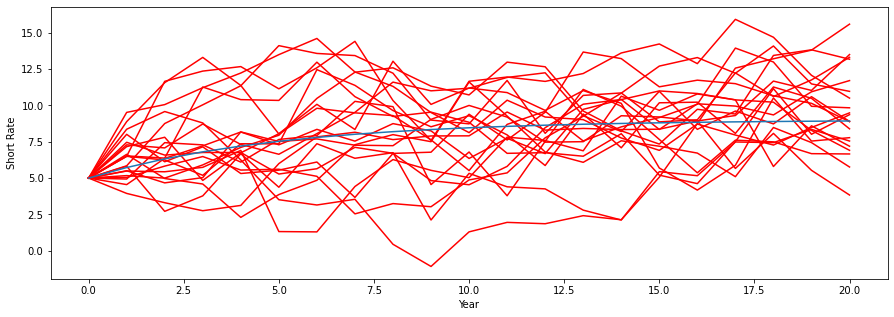

In [6]:
# Plotting the results
plt.figure(figsize=(15,5))
t_graph = np.ones(r_sim.shape)*t
plt.plot(np.transpose(t_graph), np.transpose(r_sim*100), "r")
plt.plot(t,s_mean*100)
plt.xlabel("Year")
plt.ylabel("Short Rate")
plt.show()

# References
* Bruce Tuckman, "Fixed Income Securities (Chapter: Art of Term Structure Models)"
* FRM Part 2 coursebook, Kaplan Schweser, "Market Risk Measurement and Management"
* Arnaud Blanchard, "The Two-Factor Hull-White Model : Pricing and Calibration of Interest Rates Derivatives", https://www.math.kth.se/matstat/seminarier/reports/M-exjobb12/120220b.pdf 
* WQU notes, Computational Finance